In [37]:
#importing libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, CSVLogger

In [38]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [39]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y = train["label"]
X = train.drop(["label"], axis = 1)

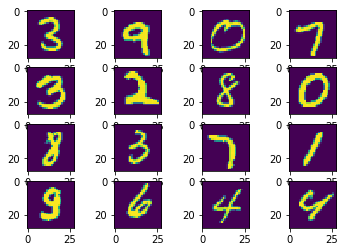

In [62]:
# PLOTTING THE DIGITS
for i in range(0,4):
    for j in range(0,4):
        index = random.randrange(0, len(X))
        plot = plt.subplot2grid((4, 4), (i, j))
        plot.imshow(X[index].reshape(28,28))
plt.show()

In [42]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# reshaping
X = X.values.reshape(-1,28,28,1)

In [44]:
X

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [45]:
test = test.values.reshape(-1,28,28,1)

In [46]:
test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [47]:
# one hot encoding
y = to_categorical(y, num_classes=10)

In [48]:
# splitting training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,shuffle = True)

In [49]:
# building the CNN
# initializing the CNN
classifier = Sequential()
# step-1 convolution
classifier.add(Convolution2D(32,(3,3), input_shape = (28,28,1), activation = 'relu')) # input_shape = (image_height, image_width, channel)
# adding another convolution layer
classifier.add(Convolution2D(32,(3,3), activation = 'relu'))
# step-2 MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.5))

classifier.add(Convolution2D(64,(3,3), activation = 'relu'))
classifier.add(Convolution2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
classifier.add(Dropout(0.5))
# step-3 Flattening
classifier.add(Flatten())
# step-4 full connection
# adding the hidden layer
classifier.add(Dense(8192, activation = 'relu'))
classifier.add(Dropout(0.5))
# adding the hidden layer
classifier.add(Dense(2048, activation = 'relu'))
classifier.add(Dropout(0.5))
# adding the output layer
classifier.add(Dense(10, activation = 'sigmoid'))

# CNN compilation
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
# fitiing the CNN model

train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=1,
                                    zoom_range=0.1, 
                                    width_shift_range=0.05,
                                    height_shift_range=0.05)
train_datagen.fit(X_train)

# Training
validation_generator = classifier.fit(train_datagen.flow(X_train,
                                                  y_train,
                                                  batch_size=512), epochs=10,
                                                  validation_data=(X_test, y_test),
                                                  verbose=1,
                                                  steps_per_epoch=X_train.shape[0] // 512,
                                                  )

Epoch 1/10
73/73 [==============================] - 78s 1s/step - loss: 0.6861 - accuracy: 0.7735 - val_loss: nan - val_accuracy: 0.9286
Epoch 2/10
73/73 [==============================] - 79s 1s/step - loss: 0.1616 - accuracy: 0.9502 - val_loss: nan - val_accuracy: 0.9412
Epoch 3/10
73/73 [==============================] - 79s 1s/step - loss: 0.1175 - accuracy: 0.9640 - val_loss: nan - val_accuracy: 0.9700
Epoch 4/10
73/73 [==============================] - 70s 966ms/step - loss: 0.0941 - accuracy: 0.9713 - val_loss: nan - val_accuracy: 0.9724
Epoch 5/10
73/73 [==============================] - 69s 951ms/step - loss: 0.0868 - accuracy: 0.9736 - val_loss: nan - val_accuracy: 0.9683
Epoch 6/10
73/73 [==============================] - 70s 952ms/step - loss: 0.0727 - accuracy: 0.9781 - val_loss: nan - val_accuracy: 0.9826
Epoch 7/10
73/73 [==============================] - 71s 975ms/step - loss: 0.0661 - accuracy: 0.9793 - val_loss: nan - val_accuracy: 0.9807
Epoch 8/10
73/73 [===========

In [34]:
predictions = classifier.predict_classes(test, verbose=1)



875/875 [==============================] - 19s 22ms/step


In [36]:
submissions = pd.DataFrame({"ImageId":list(range(1,len(predictions)+1)),
              "Label":predictions})

submissions.to_csv("submission.csv",
                    index=False,
                    header=True)
